In [3]:
#import relevant libraries
import pandas as pd
from matplotlib import pyplot as plt

In [13]:
#import data and check that data has been correctly imported
data = pd.read_csv("data/profiles.csv")
print(len(data))

59946


In [5]:
#set max_columns and max_colwidth to make it easier to see data in DataFrame
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 100

In [6]:
data.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neithe...,"currently working as an international agent for a freight\nforwarding company. import, export, d...",making people laugh.<br />\nranting about a good salting.<br />\nfinding simplicity in complexit...,"the way i look. i am a six foot half asian, half caucasian mutt. it\nmakes it tough not to notic...","books:<br />\nabsurdistan, the republic, of mice and men (only book that made me\nwant to cry), ...",food.<br />\nwater.<br />\ncell phone.<br />\nshelter.,duality and humorous things,trying to find someone to hang out with. i am down for anything\nexcept a club.,i am new to california and looking for someone to wisper my secrets\nto.,you want to be swept off your feet!<br />\nyou are tired of the norm.<br />\nyou want to catch a...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1. i am a workaholic.<br />\n2. i love to cook rega...,dedicating everyday to being an unbelievable badass.,being silly. having ridiculous amonts of fun wherever. being a\nsmart ass. ohh and i can cook. ;),NaN,i am die hard christopher moore fan. i don't really watch a lot of\ntv unless there is humor inv...,delicious porkness in all of its glories.<br />\nmy big ass doughboy's sinking into 15 new inche...,NaN,NaN,i am very open and will share just about anything.,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (poorly)",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public text on an online\ndating site makes me pleasantly u...","i make nerdy software for musicians, artists, and experimenters to\nindulge in their own weirdne...",improvising in different contexts. alternating between being\npresent and decidedly outside of a...,my large jaw and large glasses are the physical things people\ncomment on the most. when suffici...,"okay this is where the cultural matrix gets so specific, it's like\nbeing in the crosshairs.<br ...",movement<br />\nconversation<br />\ncreation<br />\ncontemplation<br />\ntouch<br />\nhumor,NaN,viewing. listening. dancing. talking. drinking. performing.,"when i was five years old, i was known as ""the boogerman"".","you are bright, open, intense, silly, ironic, critical, caring,\ngenerous, looking for an explor...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books according to the library\nof congress classification s...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, jarmusch, r.w. fassbender. . .<br />\ntwin peaks &a...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,"hey how's it going? curre

In [9]:
#explore range of values in diet column
data['diet'].value_counts()

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
kosher                    11
halal                     11
Name: diet, dtype: int64

In [8]:
#explore range of values in income column
data['income'].value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

In [14]:
#drop features from DataFrame and check if remaining features have NaN values - if so, remove them
features_to_remove = [
    'body_type', 
    'education', 
    'ethnicity', 
    'height', 
    'job', 
    'last_online', 
    'location', 
    'offspring',
    'orientation',
    'pets',
    'sex', 
    'sign',
    'speaks',
    'status',
    'religion'
]
data.drop(features_to_remove, axis=1, inplace=True)
data.isna().any()

age       False
diet       True
drinks     True
drugs      True
essay0     True
essay1     True
essay2     True
essay3     True
essay4     True
essay5     True
essay6     True
essay7     True
essay8     True
essay9     True
income    False
smokes     True
dtype: bool

In [27]:
#create DataFrame with just diet and income columns from original DataFrame
income_diet_age_df = data[['diet', 'income', 'age']].copy()
print(len(income_diet_age_df))
income_diet_df.head()

59946


,diet,income,age
0,strictly anything,-1,22
1,mostly other,80000,35
2,anything,-1,38
3,vegetarian,20000,23
4,NaN,-1,29


In [28]:
#check if either diet or income column have NaN values and drop
income_diet_age_df.isna().any()

diet       True
income    False
age       False
dtype: bool

In [34]:
#drop NaN values in diet column
income_diet_age_df_no_nan = income_diet_age_df.dropna(subset=['diet'])
print(len(income_diet_df_no_nan))
income_diet_age_df_no_nan.isna().any()

35551


diet      False
income    False
age       False
dtype: bool

In [31]:
income_diet_age_df_no_nan['income'].value_counts()

-1          28086
 20000       2003
 100000      1047
 80000        712
 30000        661
 40000        647
 50000        592
 70000        446
 60000        442
 150000       407
 1000000      377
 250000        96
 500000        35
Name: income, dtype: int64

In [35]:
#drop rows where income value is -1
income_diet_age_df_cleaned = income_diet_age_df_no_nan[income_diet_age_df_no_nan.income != -1]
print(len(income_diet_age_df_cleaned))

7465


In [38]:
#map different diets to three diet codes - 1 for anything vegan, 2 for anything vegetarian, and 3 for all other diet types
def diet_mappings(diet):
    if "vegan" in diet:
        return 1
    elif "vegetarian" in diet:
        return 2
    else:
        return 3

income_diet_age_df_cleaned['diet_code'] = income_diet_age_df_cleaned['diet'].apply(diet_mappings)
income_diet_age_df_cleaned['diet_code'].value_counts()

/Users/Andrew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


3    6384
2     911
1     170
Name: diet_code, dtype: int64

In [49]:
#Based on above error - and research on StackOverflow - have opted to create a copy of the DataFrame and assign diet_mappings to copy
analysis_df = income_diet_age_df_cleaned.copy()
analysis_df['diet_code'] = income_diet_age_df_cleaned['diet'].apply(diet_mappings)

In [50]:
print(len(analysis_df))
print(len(income_diet_age_df_cleaned))

7465
7465


In [76]:
#scale data to prevent analysis issues
from sklearn.preprocessing import scale
analysis_data = analysis_df[['income']]
scaled_data = scale(analysis_data, axis=0)
print(scaled_data[0])

[-0.1373401]


In [77]:
#Set labels using diet_code values
labels = analysis_df['diet_code']

In [78]:
#Split data into training and test sets using recommended 80/20 split
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size=0.2, random_state=2)

In [79]:
#Import KNeighborsClassifier and create a classifier based on n_neighbors = 10
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(train_data, train_labels)
score = classifier.score(test_data, test_labels)
print(score)

0.858673811119


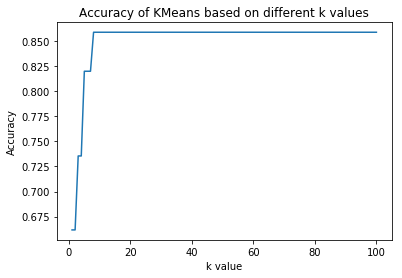

{'k': 8, 'score': 0.85867381111855323}


In [80]:
#Generate plot showing KNeighborsClassifier score based on different n_neighbors values and print out n_neighbors value that results in highest score
scores = []
highest_score = {
    'k': 0,
    'score': 0
}

for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data, train_labels)
    score = classifier.score(test_data, test_labels)
    scores.append(score)
    if score > highest_score['score']:
        highest_score = {
            'k': k,
            'score': score
        }

x_values = range(1, 101)
y_values = scores

plt.plot(x_values, y_values)
plt.title('Accuracy of KMeans based on different k values')
plt.ylabel('Accuracy')
plt.xlabel('k value')
plt.show()
print(highest_score)

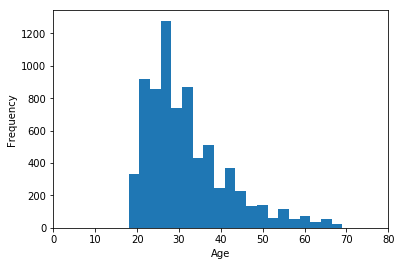

In [81]:
plt.hist(analysis_df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(0, 80)
plt.show()

In [83]:
from sklearn.metrics import classification_report, confusion_matrix 
predictions = classifier.predict(test_data)
print(confusion_matrix(test_labels, predictions))
print(classification_report(test_labels, predictions))

[[   0    0   31]
 [   0    0  180]
 [   0    0 1282]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        31
          2       0.00      0.00      0.00       180
          3       0.86      1.00      0.92      1282

avg / total       0.74      0.86      0.79      1493



/Users/Andrew/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [84]:
print(predictions[3])

3
